In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# see inline
%matplotlib inline

In [3]:
# for neural network, just saves time writing
import torch.nn as nn

In [6]:
# create inputs
X = torch.linspace(1, 50, 50).reshape(-1, 1)
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [11]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (50, 1), dtype=torch.float)
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [13]:
# set up formula, add in error terms to set up some noise
y = 2 * X + 1 + e

In [14]:
y.shape

torch.Size([50, 1])

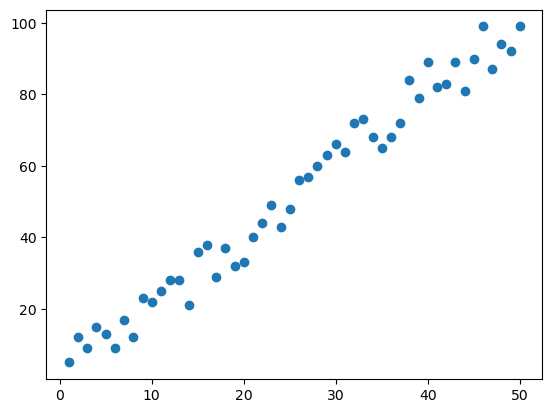

In [17]:
# plot out x vs y now, convert back to numpy arrays and plot them out
plt.scatter(X.numpy(), y.numpy())

In [18]:
# want to use pytorch and set a simple line of best fit here!
# y does not have any gradient since it is just a simple linear function

In [22]:
# set seed same as video
torch.manual_seed(59)

# takes features in and features out
model = nn.Linear(in_features=1, out_features=1)

# print out weight and bias
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [62]:
# set up model class


class Model(nn.Module):
    def __init__(self, in_features: int, out_features: int):
        # Call super class
        super().__init__()

        # Linear here does not mean linear like a function, this denotes the Layer type in this neural network
        self.linear = nn.Linear(in_features=in_features, out_features=out_features)

    def forward(self, x):
        """Returns predicted values for y."""
        y_pred = self.linear(x)
        return y_pred


# If we were doing predictions based on a house, in features may include "price", "neighborhood", ....

In [63]:
# set seed
torch.manual_seed(59)

# create model
model = Model(in_features=1, out_features=1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [64]:
# iterate over all parameters, we have very few because we are just working with a linear model
for name, param in model.named_parameters():
    print(f"{name}: {param.item()}")

linear.weight: 0.10597813129425049
linear.bias: 0.9637961387634277


In [65]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [66]:
# will print out 1.1758 = 0.10597813129425049 * 2 + 0.9637961387634277

In [67]:
# lets see how it performs off random weight and random bias
x1 = np.linspace(0.0, 50.0, 50)
print(x1)

[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]


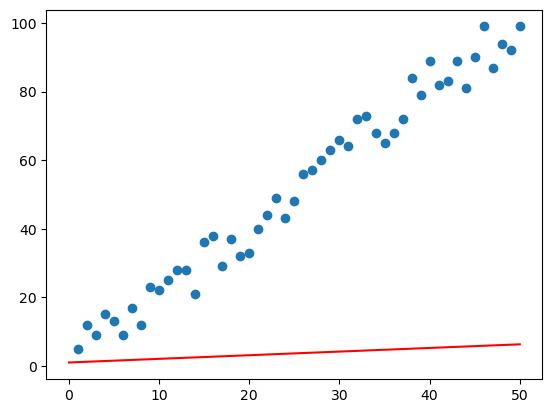

In [68]:
# based off first initial weight and bias lets see how it performs
w1 = 0.10597813129425049
b1 = 0.9637961387634277

y1 = w1 * x1 + b1

plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1, "r")

In [69]:
# This looks pretty bad! How can we get this to learn, we set the loss function! Criterion is named because that is
# the criteria we are basing performance based on. So that is why that is the name.
criterion = nn.MSELoss()

# Now we need to set a optimization function, this is where we use stochastic gradient descent, with a learning rate (how much to adjust each
# parameter on each iteration). With more complex networks we have to play around with this value a bit more. Here we choose
# stochastic gradient descent. `lr` here means learning rate. Bigger means faster but maybe less accurate. Smaller means more accurate but
# potentially longer running.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Now choose reasonable number of passes and keep track of MSE as we go along
epochs = 50
losses = []

for i in range(50):
    i = i + 1

    # GET PRED ON FORWARD PASS
    y_pred = model.forward(X)

    # CALC LOSS
    loss = criterion(y_pred, y)

    # RECORD ERROR
    losses.append(loss)
    print(
        f"""epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}"""
    )

    # RESET GRADIENT
    optimizer.zero_grad()

    # ADJUST WEIGHT AND BIAS
    loss.backward()
    optimizer.step()

epoch 1 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss: 1588.5306396484375 weight: 3.334900140762329 bias: 1.0604636669158936
epoch 3 loss: 830.2999267578125 weight: 1.014832854270935 bias: 0.9922628402709961
epoch 4 loss: 438.8521728515625 weight: 2.6817994117736816 bias: 1.0425218343734741
epoch 5 loss: 236.76144409179688 weight: 1.4840213060379028 bias: 1.0076650381088257
epoch 6 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss: 78.56572723388672 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss: 28.989229202270508 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss: 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.029116272

Text(0.5, 0, 'EPOCH')

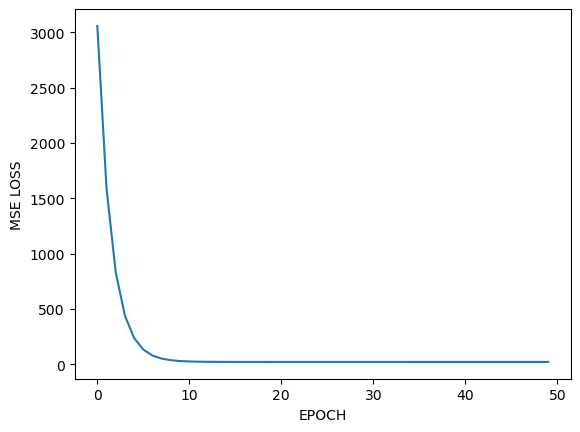

In [72]:
# LETS PLOT IT OUT
losses = [l.detach().numpy() for l in losses]
plt.plot(range(epochs), losses)
plt.ylabel("MSE LOSS")
plt.xlabel("EPOCH")

In [ ]:
# looks much better! We are getting more and more accurate predictions over each training step, eventually levelling out.

In [74]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.weight.item()

predicted_y = current_weight * x + current_bias
predicted_y

array([  1.98381913,   4.00812436,   6.03242959,   8.05673482,
        10.08104005,  12.10534529,  14.12965052,  16.15395575,
        18.17826098,  20.20256621,  22.22687144,  24.25117668,
        26.27548191,  28.29978714,  30.32409237,  32.3483976 ,
        34.37270283,  36.39700807,  38.4213133 ,  40.44561853,
        42.46992376,  44.49422899,  46.51853422,  48.54283946,
        50.56714469,  52.59144992,  54.61575515,  56.64006038,
        58.66436562,  60.68867085,  62.71297608,  64.73728131,
        66.76158654,  68.78589177,  70.81019701,  72.83450224,
        74.85880747,  76.8831127 ,  78.90741793,  80.93172316,
        82.9560284 ,  84.98033363,  87.00463886,  89.02894409,
        91.05324932,  93.07755455,  95.10185979,  97.12616502,
        99.15047025, 101.17477548])

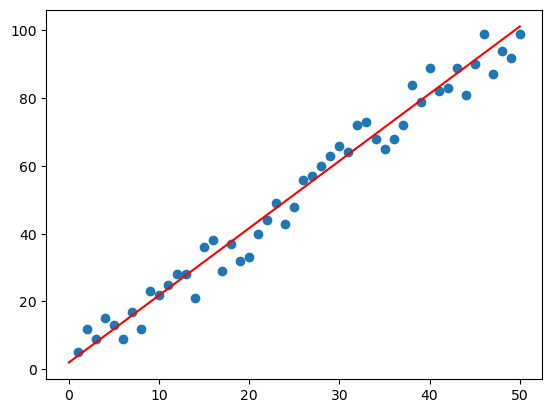

In [75]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, "r")